### Initial Setup

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-d6895c6c-8afc-fdb1-688f-8605a00cb606)


In [2]:
!git clone "https://github.com/akshatjaipuria/ComputerVision101.git"

Cloning into 'ComputerVision101'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 144 (delta 49), reused 121 (delta 33), pack-reused 0
Receiving objects: 100% (144/144), 2.14 MiB | 4.39 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [3]:
%cd '/content/ComputerVision101/BatchNormalization_Regularization'

/content/ComputerVision101/BatchNormalization_Regularization


### Dataloaders

In [4]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [5]:
device = torch.device ("cuda:0" if torch.cuda.is_available () else "cpu")
print (f"Device: {device}")

Device: cuda:0


In [6]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomRotation((-10., 10.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [7]:
from data_loader.data_loader import GetDataLoaders

train_loader, test_loader = GetDataLoaders(torchvision.datasets.MNIST, train_transforms, test_transforms, 512)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

CUDA Available? True


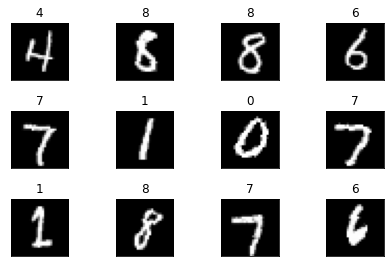

In [8]:
from visualizer.visualizer import DisplayData

DisplayData (train_loader)

### Group Normalization

In [9]:
from model.network import Normalization, Network, PrintSummary

net = Network(pNormalization=Normalization.GroupNormalization)
net.to(device)
PrintSummary(net, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              36
         GroupNorm-2            [-1, 4, 26, 26]               8
              ReLU-3            [-1, 4, 26, 26]               0
           Dropout-4            [-1, 4, 26, 26]               0
            Conv2d-5            [-1, 8, 24, 24]             288
         GroupNorm-6            [-1, 8, 24, 24]              16
              ReLU-7            [-1, 8, 24, 24]               0
           Dropout-8            [-1, 8, 24, 24]               0
            Conv2d-9           [-1, 16, 22, 22]           1,152
        GroupNorm-10           [-1, 16, 22, 22]              32
             ReLU-11           [-1, 16, 22, 22]               0
          Dropout-12           [-1, 16, 22, 22]               0
           Conv2d-13           [-1, 16, 20, 20]           2,304
        GroupNorm-14           [-1, 16,

In [10]:
from model.trainer import TrainModel

gn_training_data_dict = TrainModel(net, train_loader, test_loader, nn.NLLLoss, False, 10, 0.01)

-------------- Epoch 1 --------------


Train: Loss=1.2574 Batch_id=117 Accuracy=48.04: 100%|██████████| 118/118 [00:38<00:00,  3.03it/s]


Test set: Average loss: 1.0675, Accuracy: 7705/10000 (77.05%)

-------------- Epoch 2 --------------


Train: Loss=0.3991 Batch_id=117 Accuracy=83.60: 100%|██████████| 118/118 [00:39<00:00,  2.97it/s]


Test set: Average loss: 0.3388, Accuracy: 9276/10000 (92.76%)

-------------- Epoch 3 --------------


Train: Loss=0.3066 Batch_id=117 Accuracy=93.43: 100%|██████████| 118/118 [00:38<00:00,  3.08it/s]


Test set: Average loss: 0.1720, Accuracy: 9597/10000 (95.97%)

-------------- Epoch 4 --------------


Train: Loss=0.0988 Batch_id=117 Accuracy=95.68: 100%|██████████| 118/118 [00:38<00:00,  3.06it/s]


Test set: Average loss: 0.1165, Accuracy: 9700/10000 (97.00%)

-------------- Epoch 5 --------------


Train: Loss=0.0867 Batch_id=117 Accuracy=96.38: 100%|██████████| 118/118 [00:38<00:00,  3.08it/s]


Test set: Average loss: 0.0828, Accuracy: 9794/10000 (97.94%)

-------------- Epoch 6 --------------


Train: Loss=0.1811 Batch_id=117 Accuracy=96.80: 100%|██████████| 118/118 [00:38<00:00,  3.06it/s]


Test set: Average loss: 0.0730, Accuracy: 9817/10000 (98.17%)

-------------- Epoch 7 --------------


Train: Loss=0.1013 Batch_id=117 Accuracy=97.16: 100%|██████████| 118/118 [00:38<00:00,  3.07it/s]


Test set: Average loss: 0.0573, Accuracy: 9847/10000 (98.47%)

-------------- Epoch 8 --------------


Train: Loss=0.0938 Batch_id=117 Accuracy=97.56: 100%|██████████| 118/118 [00:38<00:00,  3.05it/s]


Test set: Average loss: 0.0542, Accuracy: 9867/10000 (98.67%)

-------------- Epoch 9 --------------


Train: Loss=0.0655 Batch_id=117 Accuracy=97.61: 100%|██████████| 118/118 [00:39<00:00,  2.98it/s]


Test set: Average loss: 0.0513, Accuracy: 9869/10000 (98.69%)

-------------- Epoch 10 --------------


Train: Loss=0.0430 Batch_id=117 Accuracy=97.75: 100%|██████████| 118/118 [00:39<00:00,  3.00it/s]


Test set: Average loss: 0.0481, Accuracy: 9865/10000 (98.65%)



### Layer Normalization

In [11]:
# Note: Layer Normalizaion is same as Group Normalization with 1 group. Hence, the summary will show Group Norm only.
net = Network(pNormalization=Normalization.LayerNormalization)
net.to(device)
PrintSummary(net, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              36
         GroupNorm-2            [-1, 4, 26, 26]               8
              ReLU-3            [-1, 4, 26, 26]               0
           Dropout-4            [-1, 4, 26, 26]               0
            Conv2d-5            [-1, 8, 24, 24]             288
         GroupNorm-6            [-1, 8, 24, 24]              16
              ReLU-7            [-1, 8, 24, 24]               0
           Dropout-8            [-1, 8, 24, 24]               0
            Conv2d-9           [-1, 16, 22, 22]           1,152
        GroupNorm-10           [-1, 16, 22, 22]              32
             ReLU-11           [-1, 16, 22, 22]               0
          Dropout-12           [-1, 16, 22, 22]               0
           Conv2d-13           [-1, 16, 20, 20]           2,304
        GroupNorm-14           [-1, 16,

In [12]:
ln_training_data_dict = TrainModel(net, train_loader, test_loader, nn.NLLLoss, False, 10, 0.01)

-------------- Epoch 1 --------------


Train: Loss=0.9209 Batch_id=117 Accuracy=55.05: 100%|██████████| 118/118 [00:39<00:00,  2.98it/s]


Test set: Average loss: 0.9473, Accuracy: 7755/10000 (77.55%)

-------------- Epoch 2 --------------


Train: Loss=0.3329 Batch_id=117 Accuracy=86.86: 100%|██████████| 118/118 [00:39<00:00,  3.01it/s]


Test set: Average loss: 0.2477, Accuracy: 9462/10000 (94.62%)

-------------- Epoch 3 --------------


Train: Loss=0.2753 Batch_id=117 Accuracy=93.67: 100%|██████████| 118/118 [00:38<00:00,  3.05it/s]


Test set: Average loss: 0.1764, Accuracy: 9544/10000 (95.44%)

-------------- Epoch 4 --------------


Train: Loss=0.1435 Batch_id=117 Accuracy=95.23: 100%|██████████| 118/118 [00:38<00:00,  3.03it/s]


Test set: Average loss: 0.0917, Accuracy: 9760/10000 (97.60%)

-------------- Epoch 5 --------------


Train: Loss=0.1509 Batch_id=117 Accuracy=95.80: 100%|██████████| 118/118 [00:38<00:00,  3.05it/s]


Test set: Average loss: 0.0884, Accuracy: 9749/10000 (97.49%)

-------------- Epoch 6 --------------


Train: Loss=0.0670 Batch_id=117 Accuracy=96.60: 100%|██████████| 118/118 [00:38<00:00,  3.03it/s]


Test set: Average loss: 0.0764, Accuracy: 9783/10000 (97.83%)

-------------- Epoch 7 --------------


Train: Loss=0.1085 Batch_id=117 Accuracy=96.93: 100%|██████████| 118/118 [00:38<00:00,  3.07it/s]


Test set: Average loss: 0.0702, Accuracy: 9790/10000 (97.90%)

-------------- Epoch 8 --------------


Train: Loss=0.0704 Batch_id=117 Accuracy=97.29: 100%|██████████| 118/118 [00:38<00:00,  3.05it/s]


Test set: Average loss: 0.0612, Accuracy: 9825/10000 (98.25%)

-------------- Epoch 9 --------------


Train: Loss=0.0854 Batch_id=117 Accuracy=97.51: 100%|██████████| 118/118 [00:38<00:00,  3.07it/s]


Test set: Average loss: 0.0491, Accuracy: 9862/10000 (98.62%)

-------------- Epoch 10 --------------


Train: Loss=0.0481 Batch_id=117 Accuracy=97.64: 100%|██████████| 118/118 [00:38<00:00,  3.04it/s]


Test set: Average loss: 0.0519, Accuracy: 9850/10000 (98.50%)



### Batch Normalization with L1

In [13]:
net = Network(pNormalization=Normalization.BatchNormalization)
net.to(device)
PrintSummary(net, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              36
       BatchNorm2d-2            [-1, 4, 26, 26]               8
              ReLU-3            [-1, 4, 26, 26]               0
           Dropout-4            [-1, 4, 26, 26]               0
            Conv2d-5            [-1, 8, 24, 24]             288
       BatchNorm2d-6            [-1, 8, 24, 24]              16
              ReLU-7            [-1, 8, 24, 24]               0
           Dropout-8            [-1, 8, 24, 24]               0
            Conv2d-9           [-1, 16, 22, 22]           1,152
      BatchNorm2d-10           [-1, 16, 22, 22]              32
             ReLU-11           [-1, 16, 22, 22]               0
          Dropout-12           [-1, 16, 22, 22]               0
           Conv2d-13           [-1, 16, 20, 20]           2,304
      BatchNorm2d-14           [-1, 16,

In [14]:
# TODO: L1 has to be added to loss
bn_training_data_dict = TrainModel(net, train_loader, test_loader, nn.NLLLoss, True, 10, 0.01)

-------------- Epoch 1 --------------


Train: Loss=1.3197 Batch_id=117 Accuracy=50.67: 100%|██████████| 118/118 [00:41<00:00,  2.87it/s]


Test set: Average loss: 0.8927, Accuracy: 7920/10000 (79.20%)

-------------- Epoch 2 --------------


Train: Loss=0.6804 Batch_id=117 Accuracy=91.47: 100%|██████████| 118/118 [00:42<00:00,  2.80it/s]


Test set: Average loss: 0.2114, Accuracy: 9600/10000 (96.00%)

-------------- Epoch 3 --------------


Train: Loss=0.4672 Batch_id=117 Accuracy=96.05: 100%|██████████| 118/118 [00:41<00:00,  2.84it/s]


Test set: Average loss: 0.1020, Accuracy: 9797/10000 (97.97%)

-------------- Epoch 4 --------------


Train: Loss=0.4077 Batch_id=117 Accuracy=97.01: 100%|██████████| 118/118 [00:41<00:00,  2.85it/s]


Test set: Average loss: 0.0987, Accuracy: 9773/10000 (97.73%)

-------------- Epoch 5 --------------


Train: Loss=0.3930 Batch_id=117 Accuracy=97.31: 100%|██████████| 118/118 [00:41<00:00,  2.86it/s]


Test set: Average loss: 0.0667, Accuracy: 9823/10000 (98.23%)

-------------- Epoch 6 --------------


Train: Loss=0.3732 Batch_id=117 Accuracy=97.40: 100%|██████████| 118/118 [00:41<00:00,  2.84it/s]


Test set: Average loss: 0.0864, Accuracy: 9767/10000 (97.67%)

-------------- Epoch 7 --------------


Train: Loss=0.3069 Batch_id=117 Accuracy=97.56: 100%|██████████| 118/118 [00:41<00:00,  2.83it/s]


Test set: Average loss: 0.0996, Accuracy: 9729/10000 (97.29%)

-------------- Epoch 8 --------------


Train: Loss=0.3661 Batch_id=117 Accuracy=97.50: 100%|██████████| 118/118 [00:41<00:00,  2.84it/s]


Test set: Average loss: 0.0735, Accuracy: 9817/10000 (98.17%)

-------------- Epoch 9 --------------


Train: Loss=0.3559 Batch_id=117 Accuracy=97.69: 100%|██████████| 118/118 [00:41<00:00,  2.87it/s]


Test set: Average loss: 0.0722, Accuracy: 9793/10000 (97.93%)

-------------- Epoch 10 --------------


Train: Loss=0.3053 Batch_id=117 Accuracy=97.79: 100%|██████████| 118/118 [00:41<00:00,  2.82it/s]


Test set: Average loss: 0.0859, Accuracy: 9799/10000 (97.99%)



### Misclassified images (from Test set)

In [15]:
from visualizer.visualizer import DisplayIncorrectPredictions

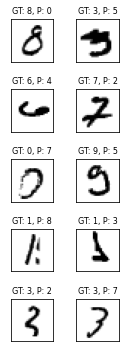

In [16]:
# From model with Group Normalization
DisplayIncorrectPredictions (gn_training_data_dict['incorrect_pred'])

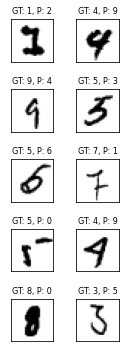

In [17]:
# From model with Layer Normalization
DisplayIncorrectPredictions (ln_training_data_dict['incorrect_pred'])

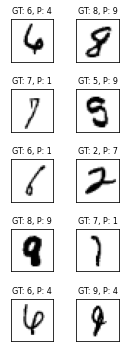

In [18]:
# From model with Batch Normalization
DisplayIncorrectPredictions (bn_training_data_dict['incorrect_pred'])

### Loss/Accuracy graphs

In [19]:
import matplotlib.pyplot as plt

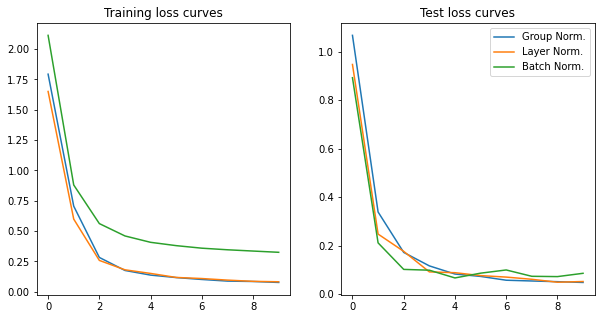

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Train losses
axs[0].plot(gn_training_data_dict['train_loss'], label='Group Norm.')
axs[0].plot(ln_training_data_dict['train_loss'], label='Layer Norm.')
axs[0].plot(bn_training_data_dict['train_loss'], label='Batch Norm.')
axs[0].set_title("Training loss curves")

# Test losses
axs[1].plot(gn_training_data_dict['test_loss'], label='Group Norm.')
axs[1].plot(ln_training_data_dict['test_loss'], label='Layer Norm.')
axs[1].plot(bn_training_data_dict['test_loss'], label='Batch Norm.')
axs[1].set_title("Test loss curves")

plt.legend()

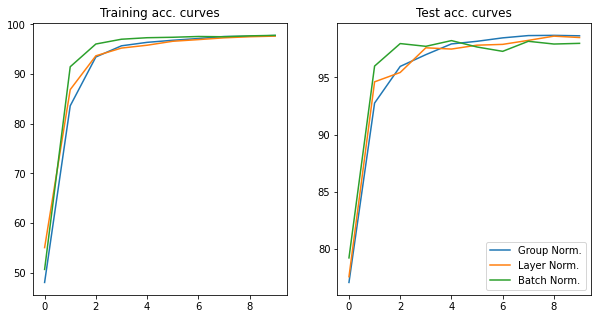

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Train Accuracies
axs[0].plot(gn_training_data_dict['train_acc'], label='Group Norm.')
axs[0].plot(ln_training_data_dict['train_acc'], label='Layer Norm.')
axs[0].plot(bn_training_data_dict['train_acc'], label='Batch Norm.')
axs[0].set_title("Training acc. curves")

# Test Accuracies
axs[1].plot(gn_training_data_dict['test_acc'], label='Group Norm.')
axs[1].plot(ln_training_data_dict['test_acc'], label='Layer Norm.')
axs[1].plot(bn_training_data_dict['test_acc'], label='Batch Norm.')
axs[1].set_title("Test acc. curves")

plt.legend()